### Import des bibliothèques

In [0]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import UpSampling2D,MaxPooling2D,Conv2D,Input,InputLayer,Flatten

### Import des jeux de données

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [16]:
link = 'https://drive.google.com/open?id=1Ky8Tr7D2404x_h-khxuqZwE5lhKjYND5' # The shareable link

fluff, id = link.split('=')

print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_data.csv')  
train_data_df = pan.read_csv('train_data.csv',encoding='utf-8')

1Ky8Tr7D2404x_h-khxuqZwE5lhKjYND5


In [17]:
link = 'https://drive.google.com/open?id=1yZ1UqZgex3IdHXYNAdtw9LnKXsJx50Rj' # The shareable link

fluff, id = link.split('=')

print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_data.csv')  
test_data_df = pan.read_csv("test_data.csv",encoding='utf-8')

1yZ1UqZgex3IdHXYNAdtw9LnKXsJx50Rj


In [18]:
link = 'https://drive.google.com/open?id=1de84hTb9JaHsGcCEGdZltfR1bCq6ioWH' # The shareable link

fluff, id = link.split('=')

print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_labels.csv')  
train_labels_df = pan.read_csv("train_labels.csv",encoding='utf-8')

1de84hTb9JaHsGcCEGdZltfR1bCq6ioWH


In [19]:
link = 'https://drive.google.com/open?id=1de84hTb9JaHsGcCEGdZltfR1bCq6ioWH' # The shareable link

fluff, id = link.split('=')

print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_labels.csv')  
test_labels_df = pan.read_csv("test_labels.csv",encoding='utf-8')

1de84hTb9JaHsGcCEGdZltfR1bCq6ioWH


### Bruitage de toutes les images

In [0]:
mean = 2
var = 13
sigma = var ** 1.5
noisy_train_data = train_data_df
gaussian = np.random.normal(mean, sigma, (noisy_train_data.values[1].reshape(28,28).shape[0],noisy_train_data.values[1].reshape(28,28).shape[1])) 
noisy_train_data = noisy_train_data.values.reshape(60000,28,28) + gaussian
noisy_test_data = test_data_df
noisy_test_data = noisy_test_data.values.reshape(10000,28,28)+gaussian

### Affichage des images non bruitées

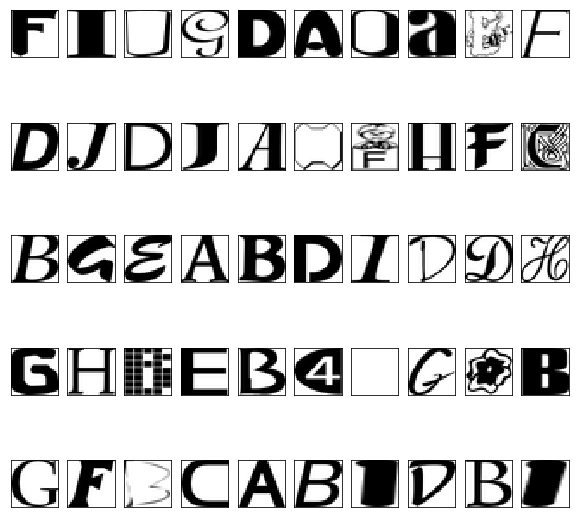

In [21]:
picture_comparison_df = train_data_df.values.reshape(60000,28,28)
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data_df.values.reshape(60000,28,28)[i],cmap='binary')
plt.show()

### Affichage des images bruitées

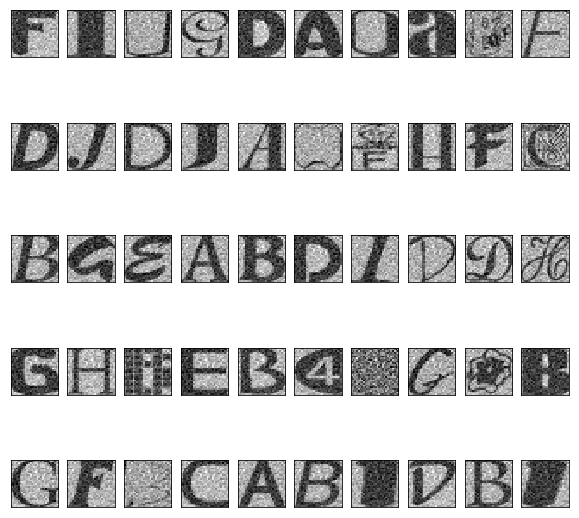

In [22]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noisy_train_data[i],cmap='binary')
plt.show()

### Division de chaque valeur par la valeur maximale de leurs lignes

In [0]:
train_data_df = train_data_df.divide(train_data_df.max(axis=0))

In [0]:
noisy_train_data = noisy_train_data/noisy_train_data.max(axis=0)

In [0]:
test_data_df = test_data_df.divide(test_data_df.max(axis=0))

In [0]:
noisy_test_data = noisy_test_data/(noisy_test_data.max(axis=0))

### Transformation des DataFrames en ndarray

In [36]:
train_data = train_data_df.values
train_data = train_data.reshape(60000,28,28,1)
train_data.shape

(60000, 28, 28, 1)

In [0]:
noisy_train_data = noisy_train_data.reshape(60000,28,28,1)

In [0]:
train_labels = train_labels_df.values
train_labels = np.ravel(train_labels)

In [0]:
test_data = test_data_df.values
test_data = test_data.reshape(10000,28,28,1)

In [0]:
noisy_test_data = noisy_test_data.reshape(10000,28,28,1)

In [0]:
test_labels = test_labels_df.values
test_labels = np.ravel(test_labels)

### Création du modèle

In [0]:
model = Sequential()

In [43]:
model.add(Conv2D(32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))

In [0]:
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))

In [0]:
model.add(UpSampling2D(size=(2,2)))

In [0]:
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))

In [0]:
model.add(UpSampling2D(size=(2,2)))

In [0]:
model.add(Conv2D(1,kernel_size=(3,3),padding='same',activation='relu'))

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
__________

In [0]:
model.compile(loss='MSE',optimizer='RMSProp')

In [55]:
history = model.fit(noisy_train_data,train_data,batch_size=128,epochs=50,validation_data=(noisy_test_data,test_data))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 20s 331us/step - loss: 0.0484 - val_loss: 0.0135
Epoch 2/50
60000/60000 [==============================] - 18s 300us/step - loss: 0.0135 - val_loss: 0.0077
Epoch 3/50
60000/60000 [==============================] - 18s 298us/step - loss: 0.0091 - val_loss: 0.0051
Epoch 4/50
60000/60000 [==============================] - 18s 299us/step - loss: 0.0070 - val_loss: 0.0052
Epoch 5/50
60000/60000 [==============================] - 18s 296us/step - loss: 0.0058 - val_loss: 0.0042
Epoch 6/50
60000/60000 [==============================] - 18s 296us/step - loss: 0.0052 - val_loss: 0.0034
Epoch 7/50
60000/60000 [==============================] - 18s 301us/step - loss: 0.0047 - val_loss: 0.0033
Epoch 8/50
60000/60000 [==============================] - 18s 299us/step - loss: 0.0043 - val_loss: 0.0034
Epoch 9/50
60000/60000 [======================

### Affichage de l'évolution du loss en fonction du temps

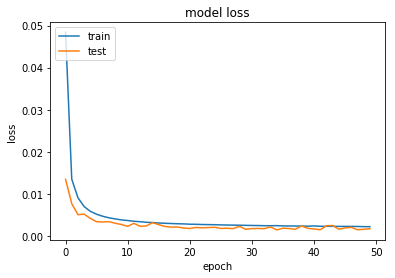

In [56]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Prédiction sur le train dataset bruité

In [0]:
prediction = model.predict(noisy_train_data)

In [0]:
noisy_train_data = noisy_train_data.reshape(60000,28,28)

### Image bruitée

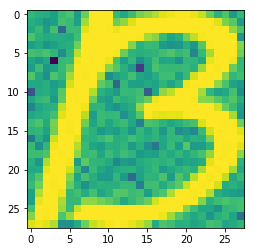

In [68]:
plt.imshow(noisy_train_data[4508])

### Image reconstituée

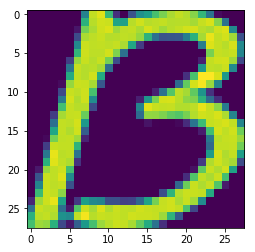

In [67]:
plt.imshow(prediction[4508].reshape(28,28))